<ipython-input-8-7efe76056a5b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nflx['Market_Sentiment'] = df_nflx['Close'] + np.random.normal(0, 5, len(df_nflx))


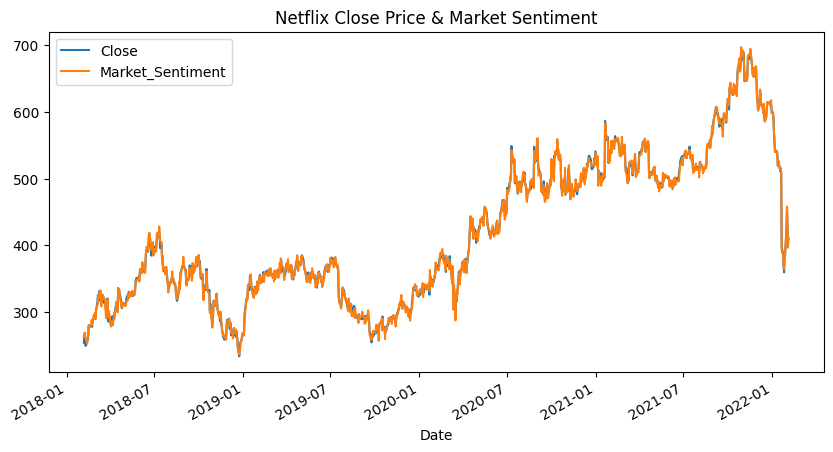

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


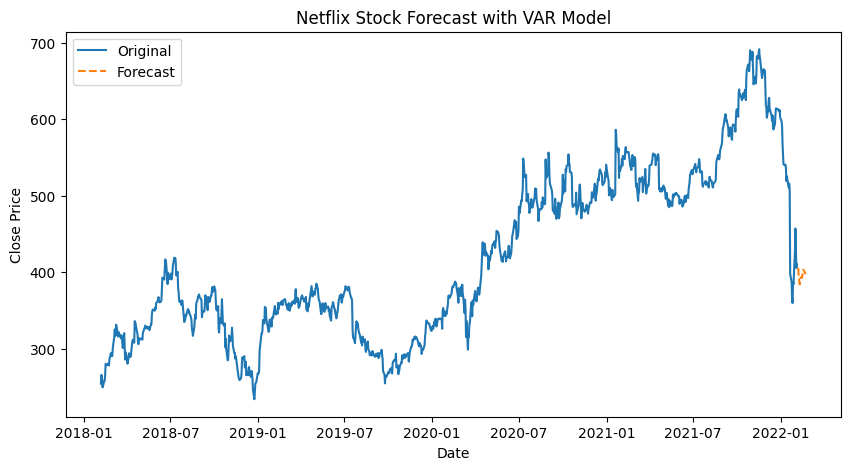

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
df_nflx=pd.read_csv("/content/drive/MyDrive/NFLX (1).csv")

# Preprocessing
df_nflx['Date'] = pd.to_datetime(df_nflx['Date'])
df_nflx.set_index('Date', inplace=True)
df_nflx = df_nflx[['Close']]

# Simulate a second time series
np.random.seed(0)
df_nflx['Market_Sentiment'] = df_nflx['Close'] + np.random.normal(0, 5, len(df_nflx))

# Plot the original series
df_nflx.plot(figsize=(10, 5))
plt.title("Netflix Close Price & Market Sentiment")
plt.show()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_nflx)
df_scaled = pd.DataFrame(scaled_data, columns=df_nflx.columns, index=df_nflx.index)

# Differencing
df_diff = df_scaled.diff().dropna()

# Fit the VAR model
model = VAR(df_diff)
results = model.fit(maxlags=15, ic='aic')

# Forecasting
forecast_steps = 12
forecast = results.forecast(df_diff.values[-results.k_ar:], steps=forecast_steps)

# Reverse differencing
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=df_nflx.index[-1], periods=forecast_steps+1, freq='B')[1:],
                           columns=df_nflx.columns)
last_values = df_scaled.iloc[-1]
forecast_reversed = forecast_df.cumsum() + last_values

# Inverse transform to original scale
forecast_original = pd.DataFrame(scaler.inverse_transform(forecast_reversed),
                                 columns=df_nflx.columns, index=forecast_reversed.index)

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(df_nflx.index, df_nflx['Close'], label='Original')
plt.plot(forecast_original.index, forecast_original['Close'], label='Forecast', linestyle='--')
plt.legend()
plt.title("Netflix Stock Forecast with VAR Model")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
